In [20]:
import pandas as pd
df = pd.read_csv("../data/sentimentdataset_cleaned.csv")
df.head()

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,...,Day,Hour,text_len,word_count,hashtag_count,emoji_count,SentimentSimple,Sentiment_norm,TextLength,LengthGroup
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,Usa,...,15,12,52,7,2,1,Positive,Positive,52,30-59
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,...,15,8,52,5,2,1,Negative,Negative,52,30-59
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,Usa,...,15,15,51,6,2,2,Positive,Positive,51,30-59
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,United Kingdom,...,15,18,52,6,2,1,Positive,Positive,52,30-59
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,...,15,19,52,8,2,1,Neutral,Neutral,52,30-59


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/sentimentdataset_cleaned.csv")

# ----- Create Engagement Column -----
df["Engagement"] = df["Likes"] + df["Retweets"]

df.head()


,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,...,Hour,text_len,word_count,hashtag_count,emoji_count,SentimentSimple,Sentiment_norm,TextLength,LengthGroup,Engagement
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,Usa,...,12,52,7,2,1,Positive,Positive,52,30-59,45.0
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,...,8,52,5,2,1,Negative,Negative,52,30-59,15.0
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,Usa,...,15,51,6,2,2,Positive,Positive,51,30-59,60.0
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,United Kingdom,...,18,52,6,2,1,Positive,Positive,52,30-59,23.0
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,...,19,52,8,2,1,Neutral,Neutral,52,30-59,37.0


/var/folders/vk/r7498ybs7tx26rytck7spbpw0000gn/T/ipykernel_21801/1414338583.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=sentiments, showfliers=False)


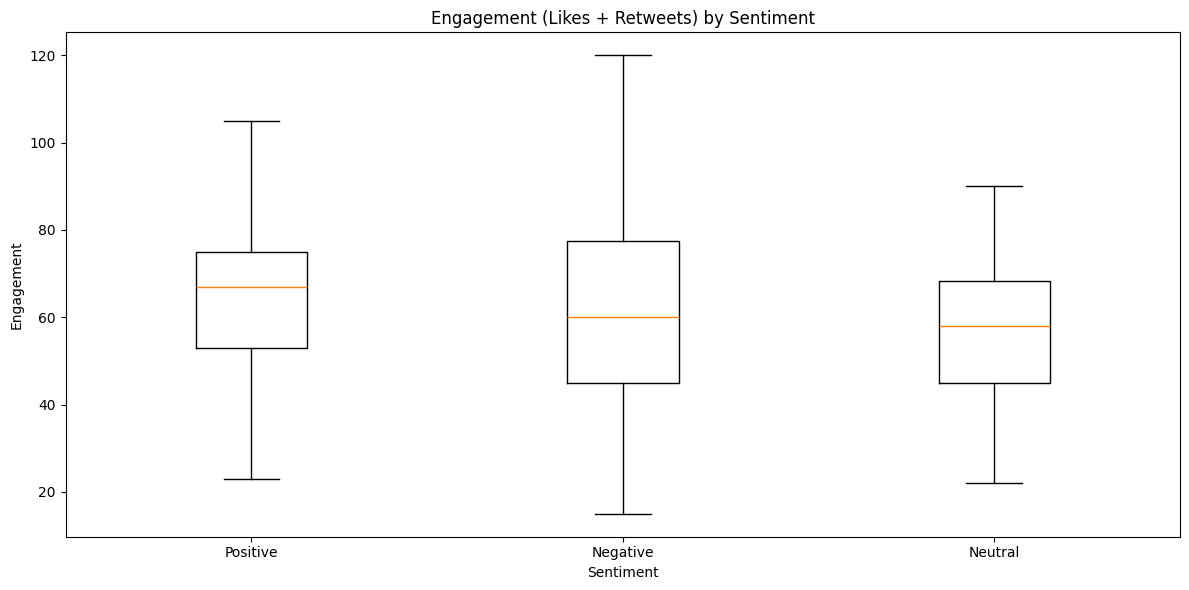

In [22]:
sentiments = df["SentimentSimple"].value_counts().index.tolist()
data_for_box = [df[df["SentimentSimple"] == s]["Engagement"].values for s in sentiments]

plt.figure(figsize=(12,6))
plt.boxplot(data_for_box, labels=sentiments, showfliers=False)

plt.title("Engagement (Likes + Retweets) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Engagement")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


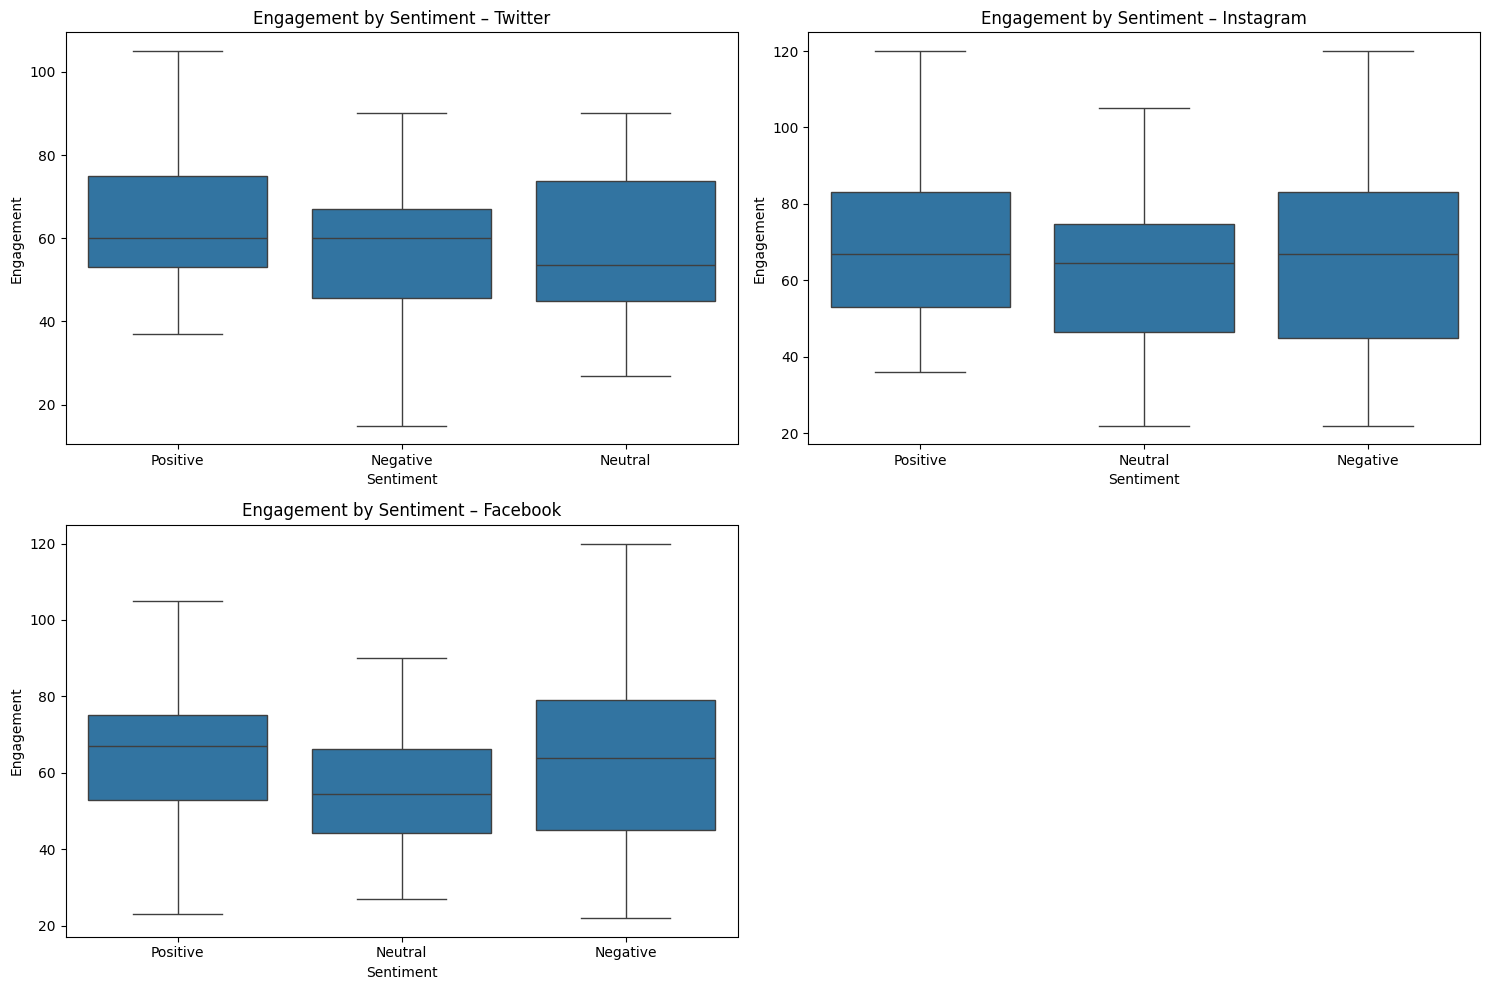

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

platforms = df["Platform"].unique()
n = len(platforms)

plt.figure(figsize=(15, 5 * (n // 2 + 1)))

for i, p in enumerate(platforms, 1):
    plt.subplot((n // 2) + 1, 2, i)
    sns.boxplot(data=df[df["Platform"] == p], 
                x="SentimentSimple", 
                y="Engagement", 
                showfliers=False)
    plt.title(f"Engagement by Sentiment – {p}")
    plt.xlabel("Sentiment")
    plt.ylabel("Engagement")

plt.tight_layout()
plt.show()


1. Instagram users respond most consistently to uplifting, aesthetic, show-and-tell style content. Negative sentiment is less reliable here — it can spike, but not as consistently as positive.
2. Negative or controversial posts on Twitter and Facebook generate more conversation, reactions, and volatility, which drives engagement spikes.
3. Across Twitter, Instagram, and Facebook:
- Neutral posts have the lowest median engagement
- The tightest IQR (most predictable but lowest impact)
- The lowest maximum engagement
Brands and creators should avoid bland, informational posts if the goal is reach or engagement.

In [24]:
# --- Normalize sentiment labels ---
df["Sentiment_norm"] = (
    df["Sentiment"].astype(str).str.strip().str.title()
)

# --- Convert timestamp ---
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# --- Extract Month (1–12) & Hour (0–23) ---
df["Month"] = df["Timestamp"].dt.month
df["Hour"] = df["Timestamp"].dt.hour


<Figure size 1200x600 with 0 Axes>

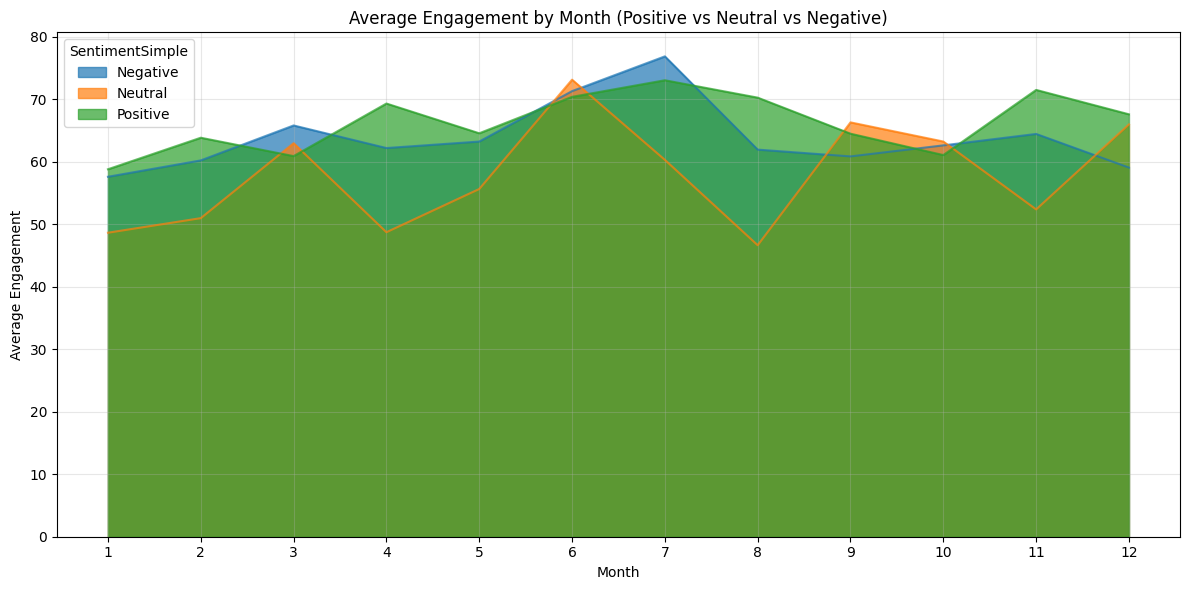

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/sentimentdataset_cleaned.csv")

# Ensure Timestamp is datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Ensure Engagement column exists
if "Engagement" not in df.columns:
    df["Engagement"] = df["Likes"] + df["Retweets"]

# Extract month
df["Month"] = df["Timestamp"].dt.month

# Monthly averages per sentiment
monthly_eng = (
    df.groupby(["Month", "SentimentSimple"])["Engagement"]
      .mean()
      .reset_index()
)

# Pivot for area plot
pivot_month = monthly_eng.pivot_table(
    index="Month",
    columns="SentimentSimple",
    values="Engagement",
    fill_value=0
).reindex(range(1, 13), fill_value=0)

# Area plot
plt.figure(figsize=(12,6))
pivot_month.plot(
    kind="area",
    stacked=False,
    alpha=0.7,
    figsize=(12,6)
)

plt.title("Average Engagement by Month (Positive vs Neutral vs Negative)")
plt.xlabel("Month")
plt.ylabel("Average Engagement")
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

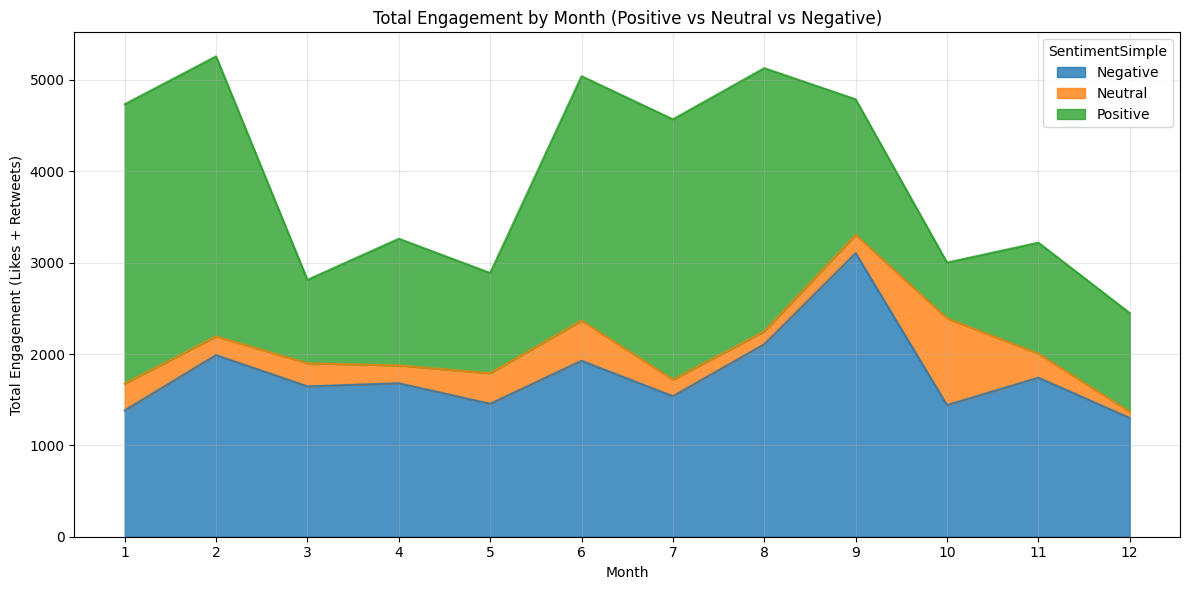

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/sentimentdataset_cleaned.csv")

# Convert to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Ensure Engagement exists
if "Engagement" not in df.columns:
    df["Engagement"] = df["Likes"] + df["Retweets"]

# Extract month
df["Month"] = df["Timestamp"].dt.month

# Sum of engagement per month per sentiment
monthly_eng = (
    df.groupby(["Month", "SentimentSimple"])["Engagement"]
      .sum()
      .reset_index()
)

# Pivot for area plot
pivot_month = monthly_eng.pivot_table(
    index="Month",
    columns="SentimentSimple",
    values="Engagement",
    fill_value=0
).reindex(range(1, 13), fill_value=0)

# AREA PLOT
plt.figure(figsize=(12,6))
pivot_month.plot(
    kind="area",
    stacked=True,        # stacked makes more sense for totals
    alpha=0.8,
    figsize=(12,6)
)

plt.title("Total Engagement by Month (Positive vs Neutral vs Negative)")
plt.xlabel("Month")
plt.ylabel("Total Engagement (Likes + Retweets)")
plt.xticks(range(1,13))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
